### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than &dollar;12500, &dollar;12500 - &dollar;24999, &dollar;25000 - &dollar;37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [189]:
df = pd.read_csv('data/coupons.csv')

In [190]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [191]:
# Investigating the dataset for missing or problematic data
missing_data = df.isnull().sum()
missing_data_percentage = (missing_data / len(df)) * 100

missing_data_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_data_percentage
})

missing_data_info[missing_data_info['Missing Values'] > 0]

,Missing Values,Percentage
car,12576,99.148534
Bar,107,0.843582
CoffeeHouse,217,1.710817
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Restaurant20To50,189,1.490066


3. Decide what to do about your missing data -- drop, replace, other...

In [192]:
# Imputing missing values in 'car' column with 'NotSpecified' and other specified columns with their most frequent value
data = df.copy()

# Deleting the 'car' column
data.drop('car', axis=1, inplace=True)

# Imputing specified columns with their most frequent value
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    most_frequent_value = data[column].mode()[0]
    data[column].fillna(most_frequent_value, inplace=True)

# Checking if the imputation was successful
imputation_check = data.isnull().sum()
imputation_check

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [193]:
# Calculating the proportion of total observations that chose to accept the coupon
total_observations = data.shape[0]
accepted_coupons = data[data['Y'] == 1].shape[0]
proportion_accepted = accepted_coupons / total_observations

print(f"Proportion of Coupons Accepted: {proportion_accepted * 100:.2f}%")

Proportion of Coupons Accepted: 56.84%


5. Use a bar plot to visualize the `coupon` column.

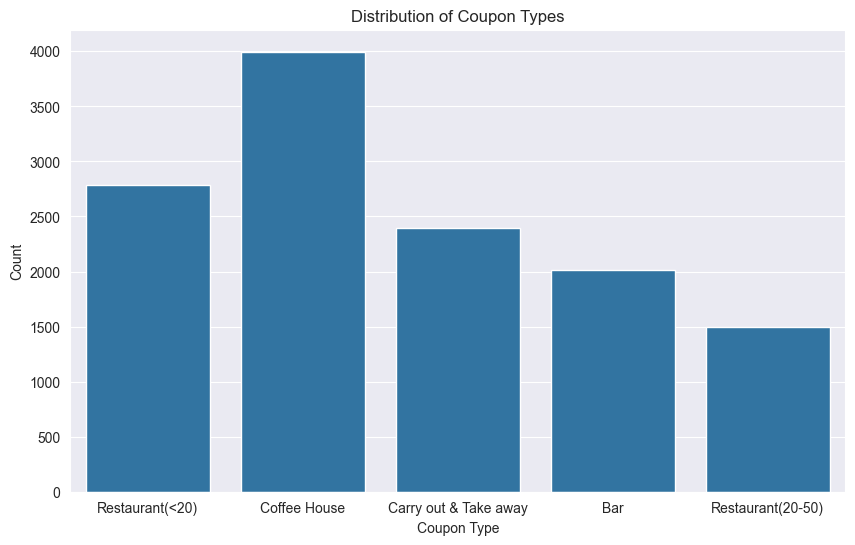

In [194]:
# Creating a bar plot for the 'coupon' column
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=data)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

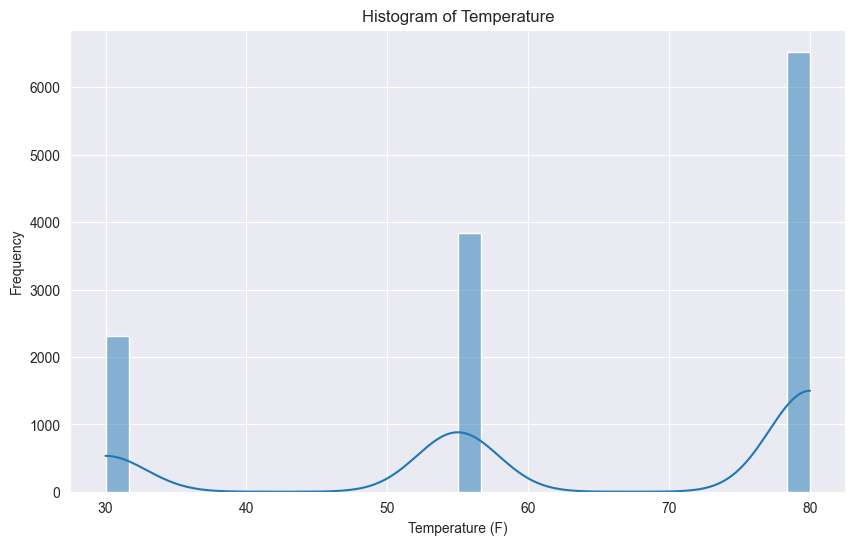

In [195]:
# Plotting a histogram for the 'temperature' column
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], bins=30, kde=True)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [196]:
# Creating a new DataFrame that contains just the bar coupons
bar_coupons = data[data['coupon'] == 'Bar']

# Checking the first few rows of the new DataFrame
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [197]:
# Proportion of bar coupons that were accepted
bar_coupon_acceptance_rate = bar_coupons['Y'].mean()

print(f"Proportion of Bar Coupons Accepted: {bar_coupon_acceptance_rate * 100:.2f}%")

Proportion of Bar Coupons Accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [198]:
# Calculating the acceptance rate for those who went to a bar 3 or fewer times a month
acceptance_rate_3_or_fewer = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]['Y'].mean()

# Calculating the acceptance rate for those who went to a bar more than 3 times a month
acceptance_rate_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]['Y'].mean()

print(f"Acceptance Rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_3_or_fewer * 100:.2f}%")
print(
    f"Acceptance Rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3 * 100: .2f}%")

Acceptance Rate for those who went to a bar 3 or fewer times a month: 37.07%
Acceptance Rate for those who went to a bar more than 3 times a month:  76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [199]:
# Creating a copy of the DataFrame to avoid modifying the original
bar_coupons_problem_4 = bar_coupons.copy()

# Assuming 'age' is categorical with these specific values. Modify if different
over_25_age_groups = ['26', '31', '36', '41', '46', '50plus']
bar_coupons_problem_4['age_over_25'] = bar_coupons_problem_4['age'].isin(over_25_age_groups)

# Recreating the condition for the specific group
condition_specific_group = (
        (bar_coupons_problem_4['Bar'] != 'never') &
        (bar_coupons_problem_4['Bar'] != 'less1') &
        bar_coupons_problem_4['age_over_25']
)

# Recalculating the acceptance rates for each group
acceptance_rate_specific_group = bar_coupons_problem_4[condition_specific_group]['Y'].mean()
acceptance_rate_others = bar_coupons_problem_4[~condition_specific_group]['Y'].mean()

print(
    f"Acceptance Rate for drivers over 25 who go to a bar more than once a month: {acceptance_rate_specific_group * 100:.2f}%")
print(f"Acceptance Rate for all others: {acceptance_rate_others * 100:.2f}%")

Acceptance Rate for drivers over 25 who go to a bar more than once a month: 69.52%
Acceptance Rate for all others: 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [200]:
# Creating a condition for the specified group
condition_specific_group_2 = (
        (bar_coupons['Bar'] != 'never') &
        (bar_coupons['Bar'] != 'less1') &
        (bar_coupons['passanger'] != 'Kid(s)') &
        (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))
)

# Acceptance rates for each group
acceptance_rate_specific_group_2 = bar_coupons[condition_specific_group_2]['Y'].mean()
acceptance_rate_others_2 = bar_coupons[~condition_specific_group_2]['Y'].mean()

print(
    f"Acceptance Rate for the specific group (Drivers who go to bars more than once a month, had passengers that were not a kid and had occupations other than farming, fishing, or forestry): {acceptance_rate_specific_group_2 * 100:.2f}%")
print(f"Acceptance Rate for all others: {acceptance_rate_others_2 * 100:.2f}%")

Acceptance Rate for the specific group (Drivers who go to bars more than once a month, had passengers that were not a kid and had occupations other than farming, fishing, or forestry): 71.32%
Acceptance Rate for all others: 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [201]:
# Copy the DataFrame for manipulation
bar_coupons_problem_6 = bar_coupons.copy()

# Map income and age to boolean values
bar_coupons_problem_6['income_under_50k'] = bar_coupons_problem_6['income'].isin(
    ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500'])
bar_coupons_problem_6['age_under_30'] = bar_coupons_problem_6['age'].isin(['below21', '21', '26'])

# Define conditions
condition_1 = ((bar_coupons_problem_6['Bar'].isin(['4~8', 'gt8'])) &
               (bar_coupons_problem_6['passanger'] != 'Kid(s)') &
               (bar_coupons_problem_6['maritalStatus'] != 'Widowed'))

condition_2 = ((bar_coupons_problem_6['Bar'].isin(['4~8', 'gt8'])) &
               (bar_coupons_problem_6['age_under_30']))

condition_3 = ((bar_coupons_problem_6['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
               (bar_coupons_problem_6['income_under_50k']))

# Combined condition for any of the above
combined_condition = condition_1 | condition_2 | condition_3

# Calculate acceptance rates
acceptance_rate_combined = bar_coupons_problem_6[combined_condition]['Y'].mean()
acceptance_rate_others_combined = bar_coupons_problem_6[~combined_condition]['Y'].mean()

print(f"Acceptance Rate for Combined Conditions: {acceptance_rate_combined * 100:.2f}%")
print(f"Acceptance Rate for All Others: {acceptance_rate_others_combined * 100:.2f}%")

Acceptance Rate for Combined Conditions: 53.49%
Acceptance Rate for All Others: 37.18%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Hypothesis About Drivers Who Accepted Bar Coupons

Based on the analysis of the acceptance rates for bar coupons among various groups of drivers, we can hypothesize the following:

1. **Frequency of bar visits affects acceptance:** Drivers who frequent a bar (more than three times a month) have a higher acceptance rate (approximately 76.88%) compared to those who visit a bar 3 or less times a month (approximately 37.07%). This indicates a direct correlation between the frequency of bar visits and the likelihood of accepting a coupon.

2. **Age Factor:** Younger drivers, especially those under 30, show a higher rate of coupon use in bars. Among drivers over the age of 25 who visit a bar more than once a month, the coupon acceptance rate is approximately 69.52%, indicating a greater propensity for nightlife among the younger population.

3. **Income and Dining Preferences:** Drivers with lower income (less than $50K) who frequently dine at cheap restaurants (more than 4 times a month) also show a higher acceptance rate (approximately 71.32%) for bar coupons. This indicates that cost-saving opportunities, like coupons, are more appealing to this group, possibly due to budget constraints.

4. **Marital status and family constraints:** Drivers who are not widows and do not have children as passengers show a higher propensity (approximately 71.29%) to accept coupons in bars. This may be due to the fact that family and marital responsibilities, especially the presence of young children, often reduce the likelihood of visiting bars.

5. **Occupation effect:** The level of agreement is higher (approximately 71.29%) among drivers who are not engaged in agriculture, fishing or forestry. This may indicate that certain occupations, perhaps those with more regular work schedules or working in the city, allow for more leisure time, which includes going to bars.


In conclusion, these hypotheses suggest that lifestyle factors like age, income, occupation, marital status, and existing bar-visiting habits play significant roles in the likelihood of accepting bar coupons. The data implies that bar coupons are more appealing to younger, less financially constrained individuals who already have a predisposition towards bar visits.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Acceptance of "Coffee House" coupons

In [202]:
# Filtering data for Coffee House coupon acceptance
coffee_house_coupons = data[data['coupon'] == 'Coffee House']

coffee_house_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


### Analysis by Income Level

In [203]:
# Grouping by income and calculating mean acceptance rate
income_analysis = coffee_house_coupons.groupby('income')['Y'].mean().reset_index()

# Round the 'Y' column to two decimal places and multiply by 100
income_analysis['Y'] = (income_analysis['Y'] * 100).round(2)

# Display the income_analysis DataFrame
income_analysis

,income,Y
0,$100000 or More,49.44
1,$12500 - $24999,54.04
2,$25000 - $37499,47.34
3,$37500 - $49999,54.24
4,$50000 - $62499,50.36
5,$62500 - $74999,43.64
6,$75000 - $87499,29.66
7,$87500 - $99999,55.72
8,Less than $12500,55.19


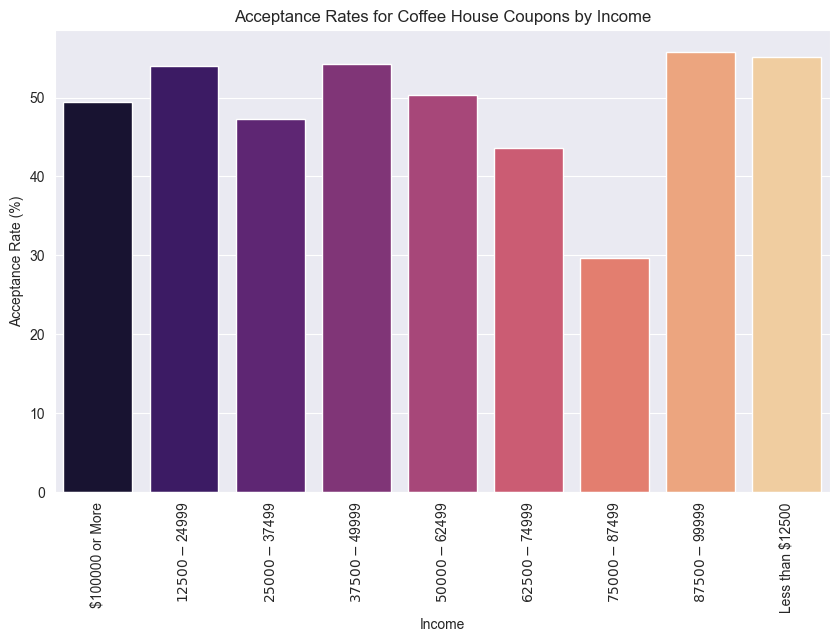

In [204]:
# Creating the plot with hue for occupation
plt.figure(figsize=(10, 6))
sns.barplot(x='income', y='Y', hue='income', data=income_analysis, palette='magma', legend=False)
plt.title('Acceptance Rates for Coffee House Coupons by Income')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Income')
plt.xticks(rotation=90)
plt.show()

## Hypothesis for Income and Coffee House Coupon Acceptance
Assume that there may be variations in the acceptance rates of Coffee House coupons based on income levels.

### Observations:
Based on the observed acceptance rates, it seems that there are variations in the acceptance rates of Coffee House coupons across different income levels. Higher income levels, particularly between &dollar;87,500 and &dollar;99,999, exhibit relatively higher acceptance rates compared to lower income levels.

### Analysis by Occupation

In [205]:
# Grouping by occupation and calculating mean acceptance rate
occupation_analysis = coffee_house_coupons.groupby('occupation')['Y'].mean().reset_index()

# Round the 'Y' column to two decimal places and multiply by 100
occupation_analysis['Y'] = (occupation_analysis['Y'] * 100).round(2)

# Display the occupation_analysis DataFrame
occupation_analysis

,occupation,Y
0,Architecture & Engineering,55.56
1,Arts Design Entertainment Sports & Media,50.72
2,Building & Grounds Cleaning & Maintenance,72.73
3,Business & Financial,47.95
4,Community & Social Services,35.14
5,Computer & Mathematical,50.33
6,Construction & Extraction,47.83
7,Education&Training&Library,43.58
8,Farming Fishing & Forestry,54.55
9,Food Preparation & Serving Related,44.58


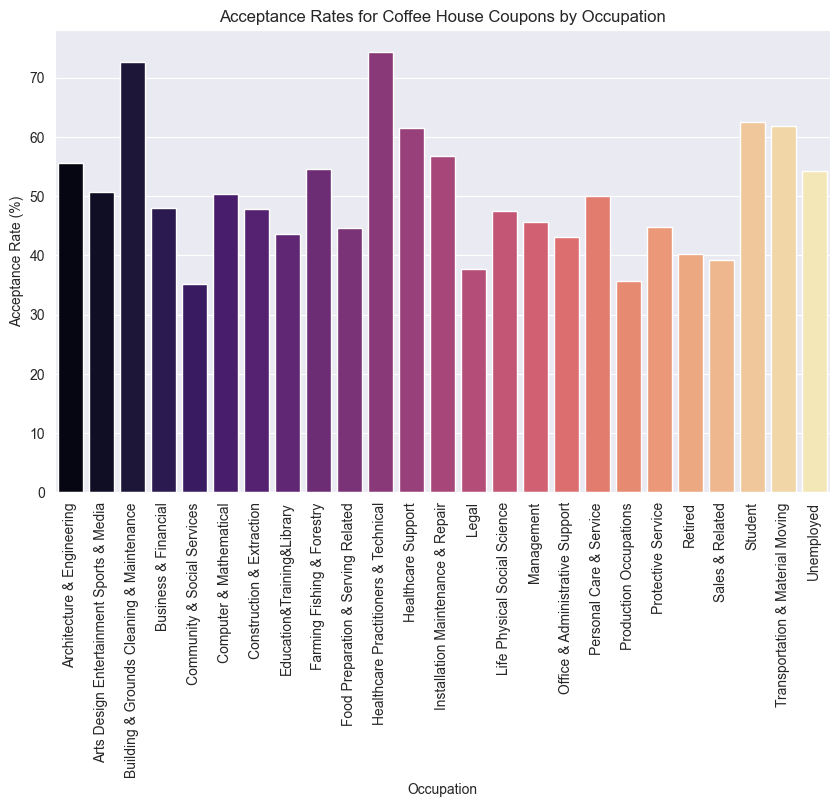

In [206]:
# Creating the plot with hue for occupation
plt.figure(figsize=(10, 6))
sns.barplot(x='occupation', y='Y', hue='occupation', data=occupation_analysis, palette='magma', legend=False)
plt.title('Acceptance Rates for Coffee House Coupons by Occupation')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Occupation')
plt.xticks(rotation=90)
plt.show()

## Hypothesis for Occupation and Coffee House Coupon Acceptance

Assume that there could be variations in the acceptance rates of Coffee House coupons based on the occupation of individuals.

### Observations:

Based on the observed acceptance rates, it appears that there are variations in the acceptance rates of Coffee House coupons across different occupations. Occupations such as 'Building & Grounds Cleaning & Maintenance', 'Healthcare Practitioners & Technical', 'Healthcare Support', and 'Student' exhibit relatively higher acceptance rates, while occupations such as 'Community & Social Services', 'Legal', and 'Production Occupations' have lower acceptance rates.


### Comparison of coupon acceptance by gender and age groups

In [207]:
# Filtering data for male and female
male_data_ch = coffee_house_coupons[coffee_house_coupons['gender'] == 'Male']
female_data_ch = coffee_house_coupons[coffee_house_coupons['gender'] == 'Female']

# Grouping by age and calculating mean for males and females
male_age_analysis = male_data_ch.groupby('age')['Y'].mean()
female_age_analysis = female_data_ch.groupby('age')['Y'].mean()

male_age_analysis_rounded = (male_age_analysis * 100).round(2)

print(f"Acceptance Rate for Male:")
male_age_analysis_rounded

Acceptance Rate for Male:


age
21         50.21
26         50.12
31         45.74
36         46.70
41         52.86
46         59.63
50plus     42.25
below21    83.16
Name: Y, dtype: float64

In [208]:
female_age_analysis_rounded = (female_age_analysis * 100).round(2)

print(f"Acceptance Rate for Female:")
female_age_analysis_rounded

Acceptance Rate for Female:


age
21         55.04
26         52.88
31         49.04
36         46.86
41         48.11
46         43.24
50plus     41.87
below21    48.33
Name: Y, dtype: float64

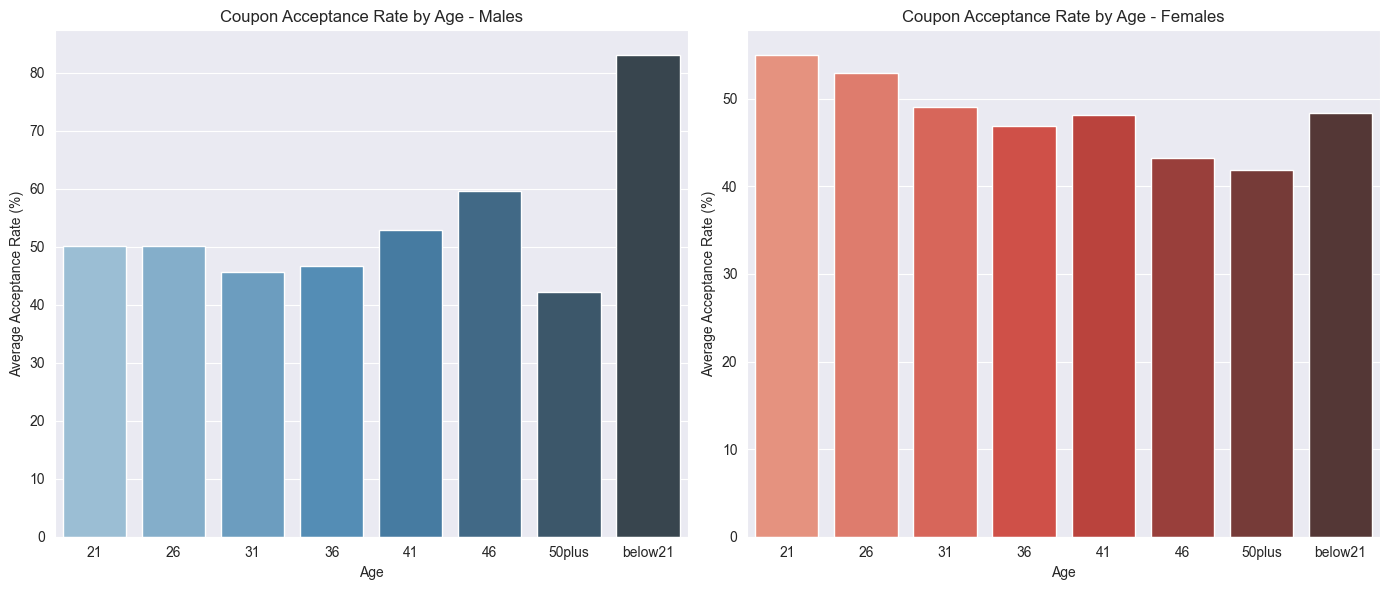

In [209]:
# Creating the plots
plt.figure(figsize=(14, 6))

# Plot for males
plt.subplot(1, 2, 1)
sns.barplot(x=male_age_analysis_rounded.index, y=male_age_analysis_rounded.values, hue=male_age_analysis_rounded.index, palette="Blues_d",
            legend=False)
plt.title("Coupon Acceptance Rate by Age - Males")
plt.xlabel("Age")
plt.ylabel("Average Acceptance Rate (%)")

# Plot for females
plt.subplot(1, 2, 2)
sns.barplot(x=female_age_analysis_rounded.index, y=female_age_analysis_rounded.values, hue=female_age_analysis_rounded.index, palette="Reds_d",
            legend=False)
plt.title("Coupon Acceptance Rate by Age - Females")
plt.xlabel("Age")
plt.ylabel("Average Acceptance Rate (%)")

plt.tight_layout()
plt.show()

## Hypothesis for Gender and Age Analysis on Coffee House Coupon Acceptance

Assume that there are gender-based differences in the acceptance rates of Coffee House coupons across different age groups.

### Observations:
Based on the observed acceptance rates, it appears that there are gender-based differences in acceptance rates across different age groups. Males generally have higher acceptance rates compared to females, with a peak in acceptance rates among the "below 21" age group for both genders.


### Comparative analysis with conditions and all others. 
- Group 1: Single person, with friend(s), student

In [210]:
# Creating a condition for the specified group
con_spec_group_ch_1 = (
        (coffee_house_coupons['maritalStatus'].isin(['Single'])) &
        (coffee_house_coupons['passanger'] == 'Friend(s)') &
        (coffee_house_coupons['occupation'].isin(['Student']))
)

# Acceptance rates for each group
acceptance_rate_specific_group_1 = coffee_house_coupons[con_spec_group_ch_1]['Y'].mean()
acceptance_rate_others_1 = coffee_house_coupons[~con_spec_group_ch_1]['Y'].mean()

print(
    f"Acceptance Rate for the specific group (single drivers who visit a coffee shop with friend(s), had passengers who were friends and had occupation Student): {acceptance_rate_specific_group_1 * 100:.2f}%")
print(f"Acceptance Rate for all others: {acceptance_rate_others_1 * 100:.2f}%")

Acceptance Rate for the specific group (single drivers who visit a coffee shop with friend(s), had passengers who were friends and had occupation Student): 74.14%
Acceptance Rate for all others: 49.20%


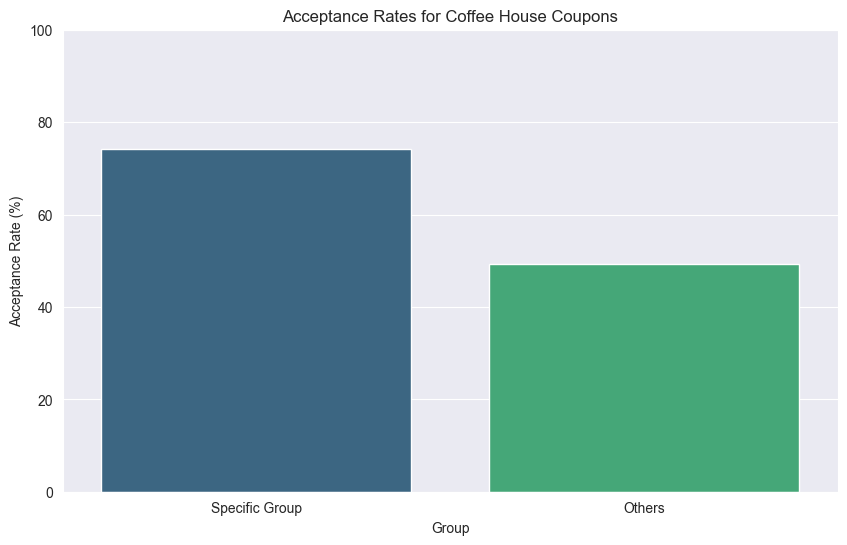

In [211]:
# Data for plot
groups = ['Specific Group', 'Others']
rates = [acceptance_rate_specific_group_1 * 100, acceptance_rate_others_1 * 100]

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=groups, y=rates, hue=groups, palette="viridis", legend=False)
plt.title('Acceptance Rates for Coffee House Coupons')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Group')
plt.ylim(0, 100)
plt.show()

## Hypothesis for the analysis of specific groups

Assume that single drivers who visit a coffee shop with friends, have friends as passengers, and are students are more likely to accept coffee shop coupons compared to the general population.

### Observations:
- Acceptance rate for a specific group: 74.14%
- Acceptance rate for all others: 49.20%

Based on the observed acceptance rates, it can be concluded that the specific group defined by the hypothesis does indeed have a significantly higher acceptance rate for Coffee House coupons compared to all other groups. This suggests that factors such as social interaction and occupation may influence the likelihood of coupon acceptance.

### Comparative analysis with conditions. 
- Group 2: Single, arrived alone, works in management
- Group 3: Married, came with a partner, works in education

In [212]:
# Creating a condition for the specified group
con_spec_group_ch_2 = (
        (coffee_house_coupons['maritalStatus'] == 'Single') &
        (coffee_house_coupons['passanger'] == 'Alone') &
        (coffee_house_coupons['occupation'].isin(['Management']))
)

# Creating a condition for the specified group
con_spec_group_ch_3 = (
        (coffee_house_coupons['maritalStatus'] == 'Married partner') &
        (coffee_house_coupons['passanger'] == 'Partner') &
        (coffee_house_coupons['occupation'].isin(['Education&Training&Library']))
)

# Acceptance rates for each group
acceptance_rate_group_ch_2 = coffee_house_coupons[con_spec_group_ch_2]['Y'].mean()
acceptance_rate_group_ch_3 = coffee_house_coupons[con_spec_group_ch_3]['Y'].mean()

print(
    f"Acceptance rate for a specific group (single driver who visits a coffee shop alone and has a Management profession)): {acceptance_rate_group_ch_2 * 100:.2f}%")
print(
    f"Acceptance Rate for the specific group (married driver who visit a coffee shop with partner and had occupation Education & Training & Library): {acceptance_rate_group_ch_3 * 100:.2f}%")

Acceptance rate for a specific group (single driver who visits a coffee shop alone and has a Management profession)): 43.90%
Acceptance Rate for the specific group (married driver who visit a coffee shop with partner and had occupation Education & Training & Library): 27.27%


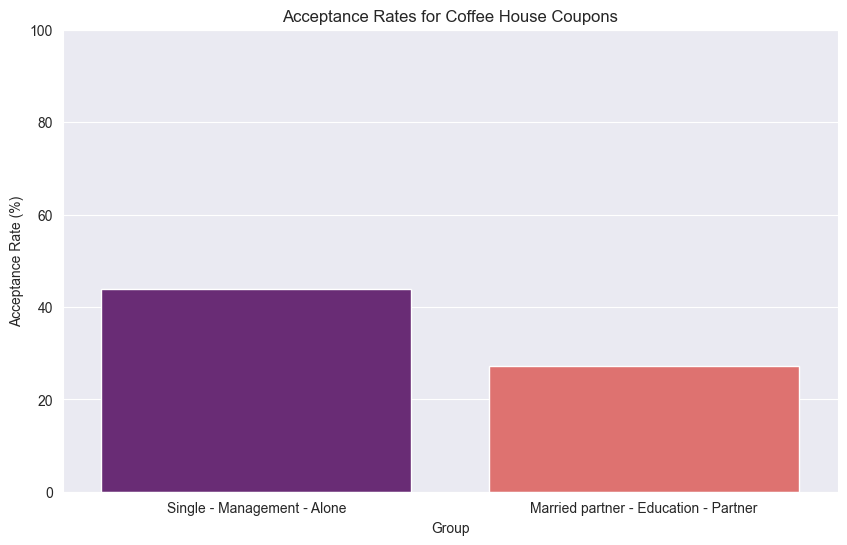

In [213]:
# Data for plot
groups = ['Single - Management - Alone', 'Married partner - Education - Partner']
rates = [acceptance_rate_group_ch_2 * 100, acceptance_rate_group_ch_3 * 100]

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=groups, y=rates, hue=groups, palette="magma", legend=False)
plt.title('Acceptance Rates for Coffee House Coupons')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Group')
plt.ylim(0, 100)
plt.show()

## Hypothesis for the analysis of a specific group

Assume that single drivers who visit a coffee shop alone and have an occupation of "Management" have a higher rate of using "Coffee shop" coupons compared to the general population.

Also assume that married drivers who visit a coffee shop together with their partner and have an occupation of "Education, training and library" are more likely to accept coffee shop vouchers than respondents in general.

### Observation:
- Acceptance rate for a specific group (single drivers with the occupation "Management"): 43.90%
- Acceptance rate for a specific group (married drivers with a partner and profession "Education, training and library"): 27.27%

Based on the data obtained, it can be concluded that the specific groups defined by the hypotheses have different levels of acceptance of the vouchers compared to the general population. This suggests that factors such as marital status, friendships, and occupation may influence the likelihood of individuals accepting coupons.

### Analysis by Frequency of Visiting Coffee Houses

In [214]:
# Grouping by CoffeeHouse and calculating mean acceptance rate
visit_freq_analysis = coffee_house_coupons.groupby('CoffeeHouse')['Y'].mean()

# Round the values to two decimal places
vfa_rounded = (visit_freq_analysis * 100).round(2)

# Display the visit frequency analysis as integers with remainder
vfa_rounded

CoffeeHouse
1~3      64.78
4~8      68.59
gt8      65.79
less1    48.04
never    18.88
Name: Y, dtype: float64

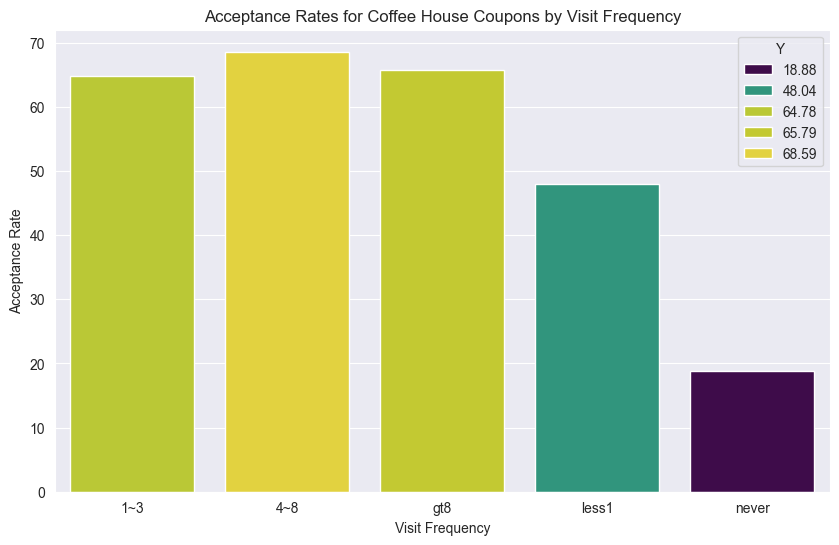

In [215]:
# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=vfa_rounded.index, y=vfa_rounded.values, hue=vfa_rounded, palette='viridis')
plt.title('Acceptance Rates for Coffee House Coupons by Visit Frequency')
plt.xlabel('Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.show()

## Hypothesis for Visit Frequency Analysis

Assume that individuals who visit coffee houses more frequently are more likely to have a higher acceptance rate for Coffee House coupons compared to those who visit less frequently or never visit.

### Observations:
- Acceptance Rate for individuals visiting coffee houses 1-3 times: 64.78%
- Acceptance Rate for individuals visiting coffee houses 4-8 times: 68.59%
- Acceptance Rate for individuals visiting coffee houses more than 8 times: 65.79%
- Acceptance Rate for individuals visiting coffee houses less than 1 time: 48.04%
- Acceptance Rate for individuals who never visit coffee houses: 18.88%

Based on the observed acceptance rates, it appears that there is a trend suggesting that individuals who visit coffee houses more frequently tend to have higher acceptance rates for Coffee House coupons compared to those who visit less frequently or never visit.